In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, auc 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier      
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb

from imblearn.over_sampling import RandomOverSampler
import  matplotlib.pyplot as plt
import seaborn as sns

In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [2]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
data = pd.read_csv('/content/sampledataset.csv')

In [5]:
data.head()

,age,gender,amount_tjs,duration,int_rate,credit_history_count,mon_remit,mon_payment,int_amount,sector,marital_status,district,is_bad_credit
0,52,0,3000.0,15,24,1,180993000,233.477,502.155,Consumer,Married,Bokhtar,0
1,40,0,8000.0,18,24,2,180993000,533.617,1605.106,Consumer,Married,Hissor,0
2,44,0,2000.0,12,20,2,180993000,185.270,223.240,Consumer,Divorced,Khujand,0
3,35,1,6800.0,24,25,1,276714667,362.927,1910.248,Consumer,Married,Tursunzoda,1
4,22,1,4800.0,24,22,1,141971000,249.016,1176.384,Consumer,Single,Dushanbe,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2669 entries, 0 to 2668
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   2669 non-null   int64  
 1   gender                2669 non-null   int64  
 2   amount_tjs            2669 non-null   float64
 3   duration              2669 non-null   int64  
 4   int_rate              2669 non-null   int64  
 5   credit_history_count  2669 non-null   int64  
 6   mon_remit             2669 non-null   int64  
 7   mon_payment           2669 non-null   float64
 8   int_amount            2669 non-null   float64
 9   sector                2669 non-null   object 
 10  marital_status        2669 non-null   object 
 11  district              2669 non-null   object 
 12  is_bad_credit         2669 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 271.2+ KB


In [7]:
for i in range(len(list(data.columns))):
  print(list(data.columns)[i-1], data[list(data.columns)[i-1]].unique())

is_bad_credit [0 1]
age [52 40 44 35 22 28 42 23 39 26 33 32 25 27 60 45 37 34 21 36 56 30 31 38
 55 41 43 24 54 51 50 46 53 47 59 29 58 61 49 63 57 48 19 20 62 64 18 65]
gender [0 1]
amount_tjs [ 3000.    8000.    2000.    6800.    4800.    1575.   17700.    2700.
  2182.4   5000.   12000.    5640.    3300.    4000.    6000.   15600.
 10000.   16000.   10500.    9300.   20000.    4200.    1650.    4900.
  5999.    3740.    2750.    3500.    3750.    3564.   10300.    1850.
  5700.    1500.    3390.   15000.    7000.   19000.    5300.    9400.
  9700.    1300.    2500.    2730.    6500.     516.    1050.     419.
  1318.    4750.    5200.    6400.   11000.   15500.    7200.   12350.
  7890.   10600.    5800.    3618.    9000.   13000.   17100.    1040.
 11500.    1000.    4290.    1751.5  18000.   15800.    4500.    5500.
 10900.   19500.    3600.    6600.    1800.    6950.    9900.    2400.
  3350.    8300.   12800.    8800.   10400.    7900.    9800.    1350.
  3025.    1030.    6300

In [7]:
data = data.replace({'is_bad_credit': {0:1, 1:0}})
data.rename(columns={'is_bad_credit': 'is_good_credit'}, inplace=True)

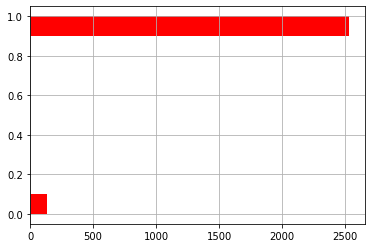

In [8]:
data['is_good_credit'].hist(orientation='horizontal', color='red')

In [9]:
data['sector'] = LabelEncoder().fit_transform(data['sector'])
data['marital_status'] = LabelEncoder().fit_transform(data['marital_status'])
data['district'] = LabelEncoder().fit_transform(data['district'])

In [10]:
X = data.drop(['is_good_credit'], axis = 1)
y = data['is_good_credit']

In [11]:
X_norm = MinMaxScaler().fit_transform(X) 

In [12]:
X_norm = pd.DataFrame(data = X_norm, columns = list(X.columns))

In [ ]:
X_norm

,age,gender,amount_tjs,duration,int_rate,credit_history_count,mon_remit,mon_payment,int_amount,sector,marital_status,district
0,0.723404,0.0,0.134598,0.363636,0.75000,0.0000,0.427004,0.053646,0.066979,0.25,0.333333,0.096774
1,0.468085,0.0,0.389128,0.454545,0.75000,0.0625,0.427004,0.125965,0.214095,0.25,0.333333,0.322581
2,0.553191,0.0,0.083692,0.272727,0.62500,0.0625,0.427004,0.042031,0.029777,0.25,0.000000,0.516129
3,0.361702,1.0,0.328041,0.636364,0.78125,0.0000,1.000000,0.084837,0.254796,0.25,0.333333,0.903226
4,0.085106,1.0,0.226229,0.636364,0.68750,0.0000,0.193416,0.057390,0.156911,0.25,0.666667,0.193548
...,...,...,...,...,...,...,...,...,...,...,...,...
2664,0.595745,1.0,0.490940,0.272727,0.75000,0.0625,0.232014,0.225232,0.179688,0.25,0.333333,0.387097
2665,0.510638,0.0,0.109145,0.272727,0.62500,0.0000,0.232014,0.053191,0.037220,0.25,0.333333,0.677419
2666,0.085106,1.0,0.236410,0.272727,0.62500,0.0000,0.232014,0.108991,0.074438,0.25,0.666667,0.193548
2667,0.148936,0.0,0.287316,0.272727,0.75000,0.0625,0.232014,0.134095,0.107814,0.25,0.666667,0.193548


In [13]:
ovs = RandomOverSampler(random_state = 42)
X_res, y_res = ovs.fit_resample(X_norm, y)

In [14]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 2531, 0: 138})
Resampled dataset shape Counter({1: 2531, 0: 2531})


In [15]:
from sklearn.utils import shuffle
X_res, y_res = shuffle(X_res, y_res)

In [16]:
X_res.reset_index(drop=True, inplace=True)
y_res.reset_index(drop=True, inplace=True)

In [17]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size = 0.25)

In [21]:
def feat_imp(model):
  importances=model.feature_importances_
  plt.figure(figsize = (20, 5))
  d_frame =  pd.DataFrame({'feat': list(X_norm.columns),
              'coef': model.feature_importances_.flatten()}).sort_values(by='coef', ascending=False).reset_index().drop(['index'], axis = 1)
  return d_frame, plt.bar(X_norm.columns, model.feature_importances_)

accuracy_score for model_adc is 0.793555638816036
confusion_matrix for model_adc is [[ 114   24]
 [ 527 2004]]
roc_auc_score for model_adc is 0.8089344304536787
sorted feature_importance dataframe of model_adc is (                    feat  coef
0             int_amount  0.24
1              mon_remit  0.18
2               district  0.16
3             amount_tjs  0.14
4            mon_payment  0.08
5                    age  0.06
6   credit_history_count  0.06
7               int_rate  0.04
8                 gender  0.02
9               duration  0.02
10                sector  0.00
11        marital_status  0.00, <BarContainer object of 12 artists>)


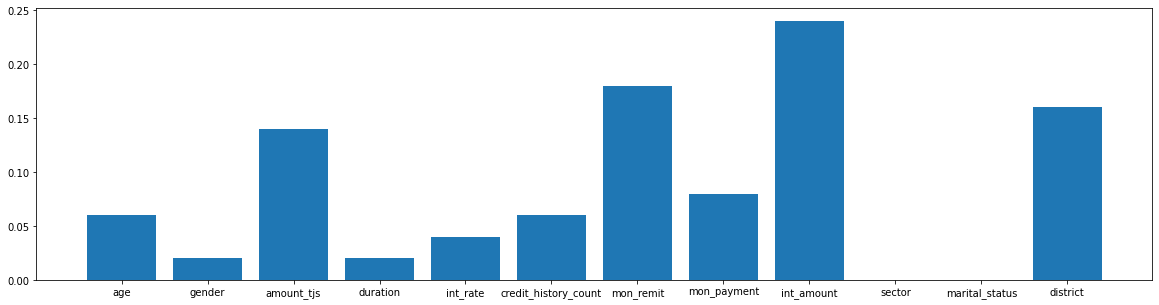

In [22]:
model_adc = AdaBoostClassifier()
model_adc.fit(X_train_res, y_train_res)
print('accuracy_score for model_adc is {}'.format(accuracy_score(y, model_adc.predict(X_norm))))
print('confusion_matrix for model_adc is {}'.format(confusion_matrix(y, model_adc.predict(X_norm))))
print('roc_auc_score for model_adc is {}'.format(roc_auc_score(y, model_adc.predict(X_norm))))
print('sorted feature_importance dataframe of model_adc is {}'.format(feat_imp(model_adc)))


accuracy_score for model_gbc is 0.8666167103784189
confusion_matrix for model_gbc is [[ 129    9]
 [ 347 2184]]
roc_auc_score for model_gbc is 0.8988413241028635
sorted feature_importance dataframe of model_gbc is (                    feat      coef
0              mon_remit  0.214404
1             int_amount  0.127302
2               district  0.122626
3             amount_tjs  0.107474
4            mon_payment  0.099480
5   credit_history_count  0.078641
6                 gender  0.076731
7                    age  0.072966
8               int_rate  0.060113
9               duration  0.018944
10        marital_status  0.016693
11                sector  0.004627, <BarContainer object of 12 artists>)


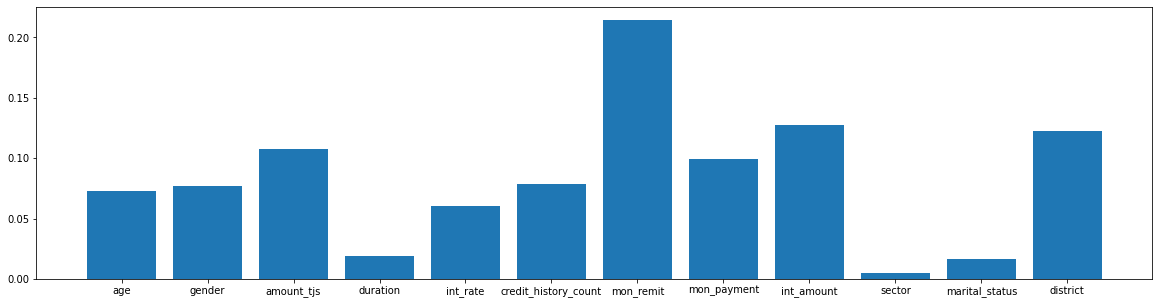

In [23]:
model_gbc = GradientBoostingClassifier()
model_gbc.fit(X_train_res, y_train_res)
print('accuracy_score for model_gbc is {}'.format(accuracy_score(y, model_gbc.predict(X_norm))))
print('confusion_matrix for model_gbc is {}'.format(confusion_matrix(y, model_gbc.predict(X_norm))))
print('roc_auc_score for model_gbc is {}'.format(roc_auc_score(y, model_gbc.predict(X_norm))))
print('sorted feature_importance dataframe of model_gbc is {}'.format(feat_imp(model_gbc)))


In [24]:
model_bc = BaggingClassifier()
model_bc.fit(X_train_res, y_train_res)
print('accuracy_score for model_bc is {}'.format(accuracy_score(y, model_bc.predict(X_norm))))
print('confusion_matrix for model_bc is {}'.format(confusion_matrix(y, model_bc.predict(X_norm))))
print('roc_auc_score for model_bc is {}'.format(roc_auc_score(y, model_bc.predict(X_norm))))

accuracy_score for model_bc is 0.9842637692019482
confusion_matrix for model_bc is [[ 138    0]
 [  42 2489]]
roc_auc_score for model_bc is 0.99170288423548


Learning rate set to 0.01821
0:	learn: 0.6846231	total: 50.9ms	remaining: 50.8s
1:	learn: 0.6794504	total: 53.6ms	remaining: 26.8s
2:	learn: 0.6714247	total: 56.6ms	remaining: 18.8s
3:	learn: 0.6654316	total: 59.4ms	remaining: 14.8s
4:	learn: 0.6580495	total: 62.2ms	remaining: 12.4s
5:	learn: 0.6501796	total: 65.3ms	remaining: 10.8s
6:	learn: 0.6432824	total: 68.1ms	remaining: 9.67s
7:	learn: 0.6368519	total: 71ms	remaining: 8.8s
8:	learn: 0.6320538	total: 73.8ms	remaining: 8.12s
9:	learn: 0.6269899	total: 76.6ms	remaining: 7.58s
10:	learn: 0.6200262	total: 79.5ms	remaining: 7.15s
11:	learn: 0.6151595	total: 82.2ms	remaining: 6.76s
12:	learn: 0.6088579	total: 84.9ms	remaining: 6.45s
13:	learn: 0.6043281	total: 87.6ms	remaining: 6.17s
14:	learn: 0.5982463	total: 90.4ms	remaining: 5.93s
15:	learn: 0.5921674	total: 93.3ms	remaining: 5.74s
16:	learn: 0.5885947	total: 96.1ms	remaining: 5.56s
17:	learn: 0.5829980	total: 98.9ms	remaining: 5.4s
18:	learn: 0.5775960	total: 102ms	remaining: 5.26

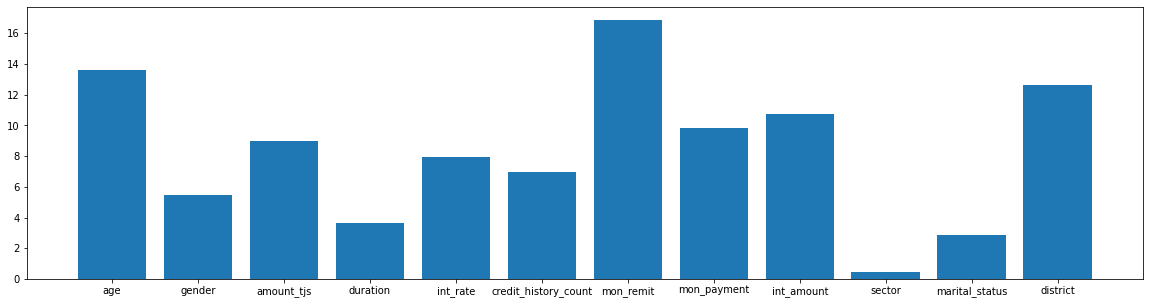

In [25]:
model_cbct = CatBoostClassifier()
model_cbct.fit(X_train_res, y_train_res)
print('accuracy_score for model_cbct is {}'.format(accuracy_score(y, model_cbct.predict(X_norm))))
print('confusion_matrix for model_cbct is {}'.format(confusion_matrix(y, model_cbct.predict(X_norm))))
print('roc_auc_score for model_cbct is {}'.format(roc_auc_score(y, model_cbct.predict(X_norm))))
print('sorted feature_importance dataframe of model_cbct is {}'.format(feat_imp(model_cbct)))

accuracy_score for model_lgb is 0.9786436867740727
confusion_matrix for model_lgb is [[ 138    0]
 [  57 2474]]
roc_auc_score for model_lgb is 0.9887396286052943
sorted feature_importance dataframe of model_lgb is (                    feat  coef
0                    age   514
1             int_amount   499
2            mon_payment   498
3               district   394
4             amount_tjs   269
5              mon_remit   261
6   credit_history_count   185
7               int_rate   141
8                 gender    79
9               duration    70
10        marital_status    69
11                sector    21, <BarContainer object of 12 artists>)


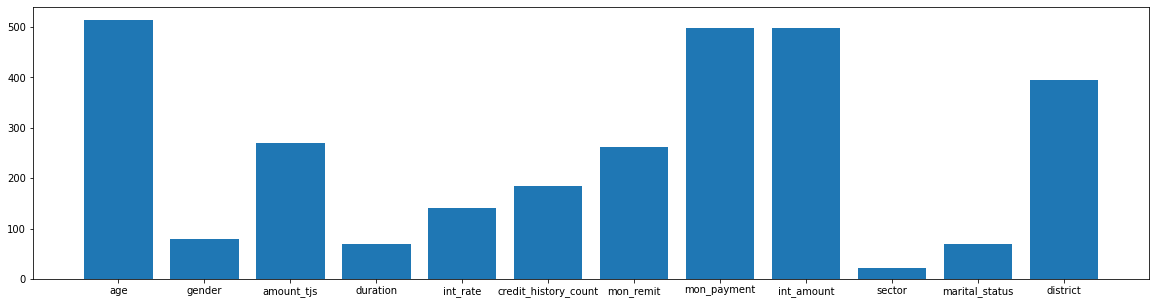

In [26]:
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_train_res, y_train_res)
print('accuracy_score for model_lgb is {}'.format(accuracy_score(y, model_lgb.predict(X_norm))))
print('confusion_matrix for model_lgb is {}'.format(confusion_matrix(y, model_lgb.predict(X_norm))))
print('roc_auc_score for model_lgb is {}'.format(roc_auc_score(y, model_lgb.predict(X_norm))))
print('sorted feature_importance dataframe of model_lgb is {}'.format(feat_imp(model_lgb)))

In [27]:
def m_lr(model):
  d_frame = pd.DataFrame({'feat': list(X_norm.columns),
              'coef': model.coef_.flatten().tolist()}).sort_values(by='coef', ascending=False).reset_index().drop(['index'], axis = 1)
  return d_frame            

accuracy_score for model_rfc is 0.9932559010865493
confusion_matrix for model_rfc is [[ 138    0]
 [  18 2513]]
roc_auc_score for model_rfc is 0.9964440932437771
sorted feature_importance dataframe of model_rfc is (                    feat      coef
0             int_amount  0.136751
1                    age  0.133145
2            mon_payment  0.128161
3             amount_tjs  0.118481
4              mon_remit  0.111453
5               district  0.101641
6   credit_history_count  0.077581
7               int_rate  0.071162
8                 gender  0.047826
9               duration  0.042849
10        marital_status  0.024837
11                sector  0.006114, <BarContainer object of 12 artists>)


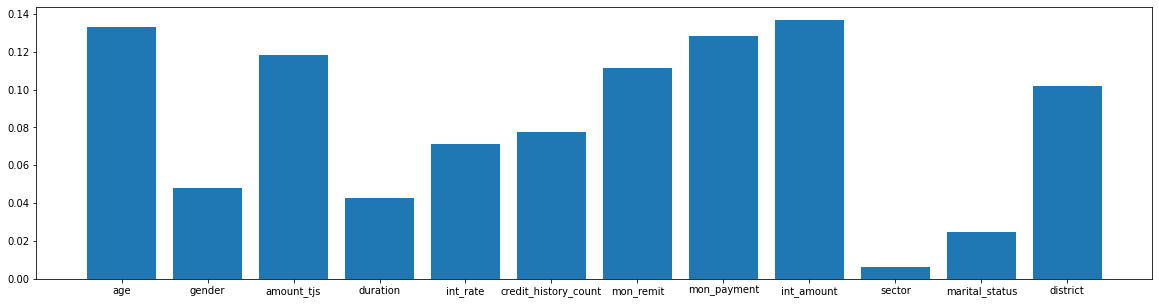

In [28]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train_res, y_train_res)
print('accuracy_score for model_rfc is {}'.format(accuracy_score(y, model_rfc.predict(X_norm))))
print('confusion_matrix for model_rfc is {}'.format(confusion_matrix(y, model_rfc.predict(X_norm))))
print('roc_auc_score for model_rfc is {}'.format(roc_auc_score(y, model_rfc.predict(X_norm))))
print('sorted feature_importance dataframe of model_rfc is {}'.format(feat_imp(model_rfc)))

In [29]:
xgb1 = xgb.XGBClassifier(
        learning_rate=0.1,
        n_estimators=150,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)

In [30]:
xgb1.fit(X_train_res, y_train_res)

XGBClassifier(n_estimators=150, nthread=4, seed=27)

In [31]:
accuracy_score(y, xgb1.predict(X_norm))

0.8838516298239041

In [32]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate=0.1, n_estimators=150,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='accuracy',n_jobs=4, cv=5)
gsearch1.fit(X_train_res, y_train_res)

GridSearchCV(cv=5,
             estimator=XGBClassifier(n_estimators=150, nthread=4, seed=27),
             n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy')

In [33]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.9797163858262256)

In [34]:
param_test2 = {
    'max_depth':[2,3,4],
    'min_child_weight':[2,3,4]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=150, 
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test2, scoring='accuracy',n_jobs=4,  cv=5)
gsearch2.fit(X_train_res, y_train_res)

GridSearchCV(cv=5,
             estimator=XGBClassifier(n_estimators=150, nthread=4, seed=27),
             n_jobs=4,
             param_grid={'max_depth': [2, 3, 4], 'min_child_weight': [2, 3, 4]},
             scoring='accuracy')

In [35]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 4, 'min_child_weight': 3}, 0.9467848970251715)

In [36]:
accuracy_score(y, gsearch2.predict(X_norm)), accuracy_score(y, gsearch1.predict(X_norm))

(0.9325590108654926, 0.9891345073061072)

In [37]:
param_test2b = {
    'min_child_weight':[5,6,7]
}
gsearch2b = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=150, max_depth=9,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test2b, scoring='accuracy',n_jobs=4, cv=5)
gsearch2b.fit(X_train_res, y_train_res)

GridSearchCV(cv=5,
             estimator=XGBClassifier(max_depth=9, n_estimators=150, nthread=4,
                                     seed=27),
             n_jobs=4, param_grid={'min_child_weight': [5, 6, 7]},
             scoring='accuracy')

In [38]:
gsearch2b.best_params_, gsearch2b.best_score_

({'min_child_weight': 5}, 0.9749767699882117)

In [39]:
accuracy_score(y, gsearch2b.predict(X_norm))

0.9797677032596478

In [40]:
param_test3 = {
    'gamma': [0.2, 0.4, 0.6, 0.8]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=150, max_depth=9, min_child_weight = 5,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test3, scoring='accuracy',n_jobs=4, cv=5)
gsearch3.fit(X_train_res, y_train_res)

GridSearchCV(cv=5,
             estimator=XGBClassifier(max_depth=9, min_child_weight=5,
                                     n_estimators=150, nthread=4, seed=27),
             n_jobs=4, param_grid={'gamma': [0.2, 0.4, 0.6, 0.8]},
             scoring='accuracy')

In [41]:
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.6}, 0.9733947021704459)

In [42]:
accuracy_score(y, gsearch3.predict(X_norm))

0.9778943424503559

In [43]:
xgb2 = xgb.XGBClassifier(
        learning_rate =0.1,
        n_estimators=150,
        max_depth=9,
        min_child_weight=5,
        gamma = 0.4,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        
        seed=27)
xgb2.fit(X_train_res, y_train_res)
accuracy_score(y, xgb2.predict(X_norm))

0.9805170475833646

In [44]:
param_test4 = {
    'subsample': [0.6,0.7,0.8,0.9,1.],
    'colsample_bytree': [0.6,0.7,0.8,0.9,1.]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=150, max_depth=9, min_child_weight = 5, gamma = 0.4,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test4, scoring='accuracy',n_jobs=4, cv=5)
gsearch4.fit(X_train_res, y_train_res)

GridSearchCV(cv=5,
             estimator=XGBClassifier(gamma=0.4, max_depth=9, min_child_weight=5,
                                     n_estimators=150, nthread=4, seed=27),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
                         'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
             scoring='accuracy')

In [45]:
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 1.0, 'subsample': 0.9}, 0.9736589002149643)

In [46]:
accuracy_score(y, gsearch4.predict(X_norm))

0.9801423754215062

In [47]:
param_test5 = {
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=150, max_depth=9, min_child_weight = 5, gamma = 0.4, subsample = 0.9, colsample_bytree = 1,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,  seed=27),  
                       param_grid = param_test5, scoring='accuracy',n_jobs=4, cv=5)
gsearch5.fit(X_train_res, y_train_res)

GridSearchCV(cv=5,
             estimator=XGBClassifier(gamma=0.4, max_depth=9, min_child_weight=5,
                                     n_estimators=150, nthread=4, seed=27,
                                     subsample=0.9),
             n_jobs=4, param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
             scoring='accuracy')

In [48]:
gsearch5.best_params_, gsearch5.best_score_

({'reg_alpha': 0.01}, 0.974185216004438)

In [49]:
accuracy_score(y, gsearch5.predict(X_norm))

0.979018358935931

In [74]:
model_xgb = xgb.XGBClassifier(
        learning_rate=0.1,     
        n_estimators=150,   
        max_depth= 9,
        min_child_weight= 5,
        gamma= 0.4,
        subsample= 0.9,
        colsample_bytree= 1,
        reg_alpha= 1e-05,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
model_xgb.fit(X_train_res, y_train_res)
accuracy_score(y, model_xgb.predict(X_norm))

0.9801423754215062

accuracy_score for model_xgb is 0.9801423754215062
confusion_matrix for model_xgb is [[ 138    0]
 [  53 2478]]
roc_auc_score for model_xgb is 0.9895298301066773
sorted feature_importance dataframe of model_xgb is (                    feat      coef
0                 gender  0.185528
1   credit_history_count  0.103422
2               int_rate  0.099638
3             amount_tjs  0.095345
4              mon_remit  0.092824
5             int_amount  0.078038
6               district  0.063640
7               duration  0.062109
8            mon_payment  0.061293
9                    age  0.058082
10        marital_status  0.054519
11                sector  0.045561, <BarContainer object of 12 artists>)


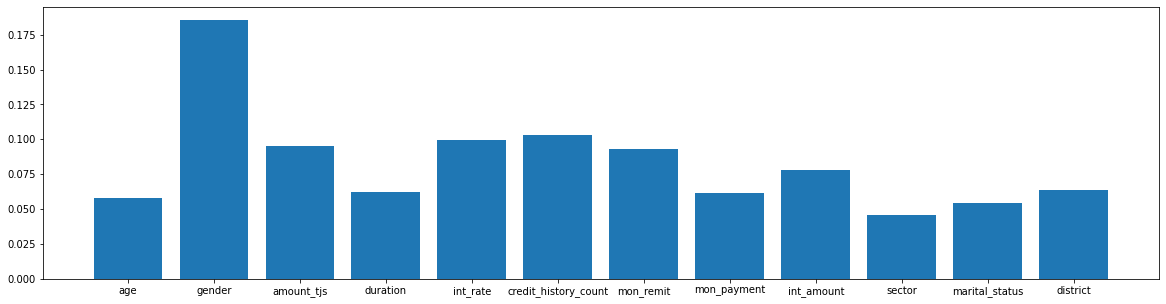

In [144]:
print('accuracy_score for model_xgb is {}'.format(accuracy_score(y, model_xgb.predict(X_norm))))
print('confusion_matrix for model_xgb is {}'.format(confusion_matrix(y, model_xgb.predict(X_norm))))
print('roc_auc_score for model_xgb is {}'.format(roc_auc_score(y, model_xgb.predict(X_norm))))
print('sorted feature_importance dataframe of model_xgb is {}'.format(feat_imp(model_xgb)))

In [52]:
param_test_lr1 = {
    'C': [1e-4, 1e-2, 1e-1, 10, 1000, 10000]
     }
gsearch1r = GridSearchCV(LogisticRegression(), param_test_lr1)
gsearch1r.fit(X_train_res, y_train_res)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.01, 0.1, 10, 1000, 10000]})

In [53]:
gsearch1r.best_params_, gsearch1r.best_score_

({'C': 10}, 0.6585829692809098)

In [54]:
param_test_lr2 = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty' : ['l1', 'l2'],
    'max_iter' :[1,10,100,1000]
}
gsearch2r = GridSearchCV(LogisticRegression(C = 1000), param_test_lr2)
gsearch2r.fit(X_train_res, y_train_res)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  w

GridSearchCV(estimator=LogisticRegression(C=1000),
             param_grid={'max_iter': [1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [55]:
gsearch2r.best_params_, gsearch2r.best_score_

({'max_iter': 10, 'penalty': 'l2', 'solver': 'sag'}, 0.659370709382151)

In [143]:
model_lr = LogisticRegression(max_iter = 10, penalty = 'l2', solver = 'lbfgs', C = 1000)
model_lr.fit(X_train_res, y_train_res)
print('accuracy_score for model_lr is {}'.format(accuracy_score(y, model_lr.predict(X_norm) > 0.5)))
print('confusion_matrix for model_lr is {}'.format(confusion_matrix(y, model_lr.predict(X_norm))))
print('roc_auc_score for model_lr is {}'.format(roc_auc_score(y, model_lr.predict(X_norm))))
print('sorted feature_importance dataframe of model_lr is {}'.format(m_lr(model_lr)))

accuracy_score for model_lr is 0.646309479205695
confusion_matrix for model_lr is [[  91   47]
 [ 897 1634]]
roc_auc_score for model_lr is 0.6525074582424316
sorted feature_importance dataframe of model_lr is                     feat      coef
0   credit_history_count  1.716068
1                    age  0.989036
2               int_rate  0.652464
3            mon_payment  0.015264
4               district -0.358018
5             int_amount -0.405967
6               duration -0.486804
7                 sector -0.701105
8              mon_remit -0.770547
9         marital_status -0.871096
10                gender -0.892470
11            amount_tjs -1.059365


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




```
2.Обучение модели:
a.Обучите модели классификации скоринга: Gradient Boosting,  Random    Forest   Logistic Regression в Python. Используйте переменные из набора данных банка 
А для обучения моделей.
b. Сохраните результаты работы (матрица запутанности, AUC, точность) для каждой модели в листе Excel.
```


In [145]:
models = [model_adc, model_bc, model_cbct, model_gbc, model_lgb, model_lr, model_rfc, model_xgb]
models_name = ['model_adc', 'model_bc', 'model_cbct', 'model_gbc', 'model_lgb', 'model_lr', 'model_rfc', 'model_xgb']
def metric(models, models_name):
  metrics = []
  for i in range(len(models)):
    metrics.append([models_name[i], accuracy_score(y, models[i].predict(X_norm)), roc_auc_score(y, models[i].predict(X_norm)), confusion_matrix(y, models[i].predict(X_norm))])
  return metrics
metric(models, models_name)  

[['model_adc', 0.793555638816036, 0.8089344304536787, array([[ 114,   24],
         [ 527, 2004]])],
 ['model_bc', 0.9842637692019482, 0.99170288423548, array([[ 138,    0],
         [  42, 2489]])],
 ['model_cbct', 0.9763956538029225, 0.98755432635322, array([[ 138,    0],
         [  63, 2468]])],
 ['model_gbc', 0.8666167103784189, 0.8988413241028635, array([[ 129,    9],
         [ 347, 2184]])],
 ['model_lgb', 0.9786436867740727, 0.9887396286052943, array([[ 138,    0],
         [  57, 2474]])],
 ['model_lr', 0.646309479205695, 0.6525074582424316, array([[  91,   47],
         [ 897, 1634]])],
 ['model_rfc', 0.9932559010865493, 0.9964440932437771, array([[ 138,    0],
         [  18, 2513]])],
 ['model_xgb', 0.9801423754215062, 0.9895298301066773, array([[ 138,    0],
         [  53, 2478]])]]



```
3a.
Оцените результаты:
Исходя из полученных вами результатов, какая модель является лучшей? Какую метрику вы использовали для определения лучшей модели?



```
Cравниваются модели: Random Forest Classifier, XGBClassifier и
Logistic Regression. 
```


```
Random Forest Classifier  и XGBClassifier  
являются лучшими модельями потому что показывают 
максильную чистую прибыль и минимальную
упущеную выгоду, которые определы по метрике confusion_matrix.

```








```
3b:
Какая модель…
...выдает больше кредитов?
...отказывает большему количеству клиентов?

```
 

```
Сравнения приводятся для трех моделей: 
Logistic Regression [выдача = 2529, отказ = 140], 
Random Forest [выдача = 2513, отказ = 156], 
XGBClassifier [выдача = 2478, отказ = 191]



```




In [126]:
# 3b CatBoostClassifier
cm_cbct = confusion_matrix(data['is_good_credit'], model_cbct.predict(X_norm))
print('число выдаваемых кредитов (TP+FP) при model_cbct ->', cm_cbct[1][1] + cm_cbct[0][1])
print('число отказов  выдаваемых кредитов (FN+TN) при model_cbct ->',cm_cbct[0][0] + cm_cbct[1][0])

число выдаваемых кредитов (TP+FP) при model_cbct -> 2468
число отказов  выдаваемых кредитов (FN+TN) при model_cbct -> 201


In [125]:
# 3b LGBMClassifier
cm_lgb = confusion_matrix(data['is_good_credit'], model_lgb.predict(X_norm))
print('число выдаваемых кредитов (TP+FP) при model_lgb ->', cm_lgb[1][1] + cm_lgb[0][1])
print('число отказов  выдаваемых кредитов (FN+TN) при model_lgb ->',cm_lgb[0][0] + cm_lgb[1][0])

число выдаваемых кредитов (TP+FP) при model_lgb -> 2474
число отказов  выдаваемых кредитов (FN+TN) при model_lgb -> 195


In [123]:
# 3b GradientBoostingClassifier
cm_gbc = confusion_matrix(data['is_good_credit'], model_gbc.predict(X_norm))
print('число выдаваемых кредитов (TP+FP) при model_gbc ->', cm_gbc[1][1] + cm_gbc[0][1])
print('число отказов  выдаваемых кредитов (FN+TN) при model_gbc ->',cm_gbc[0][0] + cm_gbc[1][0])

число выдаваемых кредитов (TP+FP) при model_gbc -> 2193
число отказов  выдаваемых кредитов (FN+TN) при model_gbc -> 476


In [122]:
# 3b BaggingClassifier
cm_bc = confusion_matrix(data['is_good_credit'], model_bc.predict(X_norm))
print('число выдаваемых кредитов (TP+FP) при model_rfc ->', cm_bc[1][1] + cm_bc[0][1])
print('число отказов  выдаваемых кредитов (FN+TN) при model_rfc ->',cm_bc[0][0] + cm_bc[1][0])

число выдаваемых кредитов (TP+FP) при model_rfc -> 2489
число отказов  выдаваемых кредитов (FN+TN) при model_rfc -> 180


In [121]:
# 3b AdaBoostClassifier
cm_adc = confusion_matrix(data['is_good_credit'], model_adc.predict(X_norm))
print('число выдаваемых кредитов (TP+FP) при model_adc ->', cm_adc[1][1] + cm_adc[0][1])
print('число отказов  выдаваемых кредитов (FN+TN) при model_adc ->',cm_adc[0][0] + cm_adc[1][0])

число выдаваемых кредитов (TP+FP) при model_adc -> 2028
число отказов  выдаваемых кредитов (FN+TN) при model_adc -> 641


In [120]:
# 3b LogisticRegression
cm_lr = confusion_matrix(data['is_good_credit'], model_lr.predict((X_norm) > 0.5))
print('число выдаваемых кредитов (TP+FP) при model_lr ->',cm_lr[1][1] + cm_lr[0][1])
print('число отказов  выдаваемых кредитов (FN+TN) при model_lr ->',cm_lr[0][0] + cm_lr[1][0])

число выдаваемых кредитов (TP+FP) при model_lr -> 2306
число отказов  выдаваемых кредитов (FN+TN) при model_lr -> 363


In [119]:
# 3b RandomForestClassifier
cm_rfc = confusion_matrix(data['is_good_credit'], model_rfc.predict(X_norm))
print('число выдаваемых кредитов (TP+FP) при model_rfc ->', cm_rfc[1][1] + cm_rfc[0][1])
print('число отказов  выдаваемых кредитов (FN+TN) при model_rfc ->',cm_rfc[0][0] + cm_rfc[1][0])

число выдаваемых кредитов (TP+FP) при model_rfc -> 2513
число отказов  выдаваемых кредитов (FN+TN) при model_rfc -> 156


In [115]:
# 3b XGBClassifier
cm_xgb = confusion_matrix(data['is_good_credit'], model_xgb.predict(X_norm))
print('число выдаваемых кредитов (TP+FP) при model_xgb ->',cm_xgb[1][1] + cm_xgb[0][1])
print('число отказов  выдаваемых кредитов (FN+TN) при model_xgb ->',cm_xgb[0][0] + cm_xgb[1][0])

число выдаваемых кредитов (TP+FP) при model_xgb -> 2478
число отказов  выдаваемых кредитов (FN+TN) при model_xgb -> 191




```

Предположим, что сумма среднего кредита составляет 5000 сомони:
Используя матрицу запутанности, рассчитайте приведенные ниже финансовые показатели для каждой модели:
Прибыль.
Убыток.
Упущенная выгода.
Чистая прибыль.

```



In [127]:
model_data = X_norm.copy()

In [128]:
model_data['is_good_credit'] = y
model_data['model_lr_y'] = model_lr.predict(X_norm)
model_data['model_adc_y'] = model_adc.predict(X_norm)
model_data['model_gbc_y'] = model_gbc.predict(X_norm)
model_data['model_bc_y'] = model_bc.predict(X_norm)
model_data['model_rfc_y'] = model_rfc.predict(X_norm)
model_data['model_xgb_y'] = model_xgb.predict(X_norm)
model_data['model_lgb_y'] = model_lgb.predict(X_norm)
model_data['model_cbct_y'] = model_cbct.predict(X_norm)

In [140]:
def finance(mod, model_name):
  tp_data = model_data.loc[(model_data['is_good_credit'] == 1) & (model_data[mod] == 1)]['int_amount']

  fp_data = model_data.loc[(model_data['is_good_credit'] == 0) & (model_data[mod] == 1)]['int_amount']
  
  fn_data = model_data.loc[(model_data['is_good_credit'] == 1) & (model_data[mod] == 0)]['int_amount']

   
  
  sum_tp = data.loc[list(tp_data.index)]['int_amount'].sum() 
  sum_fp = data.loc[list(fp_data.index)]['int_amount'].sum() 
  sum_fn = data.loc[list(fn_data.index)]['int_amount'].sum() 
  def loss(sum_tp, sum_fp):
    if((sum_tp - sum_fp) < 0):
       losss = - profit
    else:
       losss = 0
    return losss     
  

  profit = 'Прибыль по модели {}'.format(model_name) + '= TP - FP = {}'.format(sum_tp - sum_fp)
  net_profit = 'Чистая прибыль по модели {}'.format(model_name) + '= TP - FP = {}'.format(sum_tp - sum_fp)
  loss_profit = 'Упущенная выгода по модели {}'.format(model_name) + '= FN = {}'.format(sum_fn)
  loss = 'Убыток по модели {}'.format(model_name) + 'равно {}'.format(loss(sum_tp, sum_fp))
  return [profit, net_profit, loss_profit, loss]

In [141]:
fin = ['model_lr_y', 'model_adc_y', 'model_gbc_y', 'model_bc_y', 'model_rfc_y', 'model_xgb_y', 'model_lgb_y', 'model_cbct_y']
names = ['LogisticRegression', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'BaggingClassifier', 'RandomForestClassifier',
         'XGBClassifier', 'LGBMClassifier', 'CatBoostClassifier']
for i in range(len(fin)):
  print(finance(fin[i], names[i]))         

['Прибыль по модели LogisticRegression= TP - FP = 1718571.3530000001', 'Чистая прибыль по модели LogisticRegression= TP - FP = 1718571.3530000001', 'Упущенная выгода по модели LogisticRegression= FN = 1616828.571', 'Убыток по модели LogisticRegressionравно 0']
['Прибыль по модели AdaBoostClassifier= TP - FP = 2470506.5710000005', 'Чистая прибыль по модели AdaBoostClassifier= TP - FP = 2470506.5710000005', 'Упущенная выгода по модели AdaBoostClassifier= FN = 887143.915', 'Убыток по модели AdaBoostClassifierравно 0']
['Прибыль по модели GradientBoostingClassifier= TP - FP = 2714779.214', 'Чистая прибыль по модели GradientBoostingClassifier= TP - FP = 2714779.214', 'Упущенная выгода по модели GradientBoostingClassifier= FN = 664611.8520000001', 'Убыток по модели GradientBoostingClassifierравно 0']
['Прибыль по модели BaggingClassifier= TP - FP = 3325913.7539999997', 'Чистая прибыль по модели BaggingClassifier= TP - FP = 3325913.7539999997', 'Упущенная выгода по модели BaggingClassifier= F